In [1]:
#SALES PREDICTION

In [2]:
#IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [4]:
# LOADING &READING DATASET

In [5]:
data1=pd.read_csv('Advertising.csv')

In [6]:
data1

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
data1.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
data1.tail(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [9]:
#EXPLORATORY DATA ANALYSIS

In [10]:
data1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
data1.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
data1.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [14]:
data1.shape

(200, 5)

In [15]:
data1.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [16]:
#DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170FFF04648>,
      dtype=object)

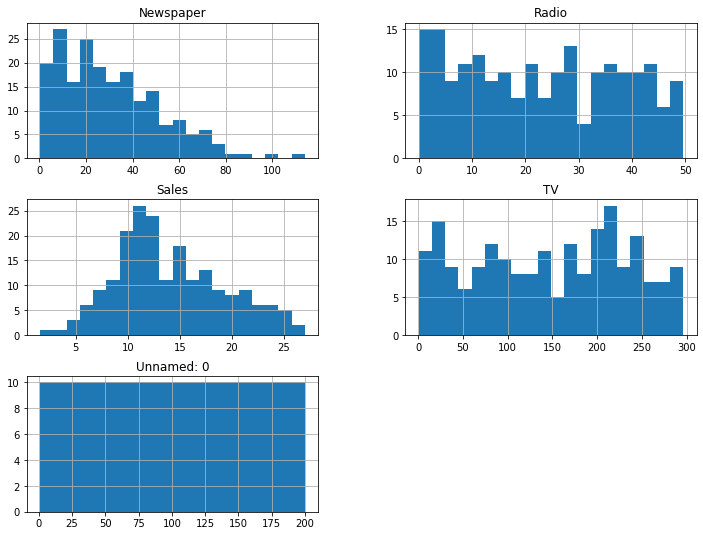

In [17]:
data1.hist(bins=20, figsize=(12, 9))

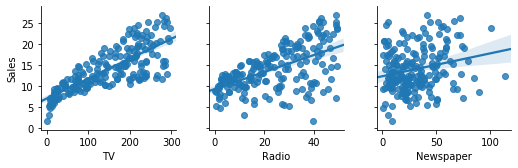

In [18]:
sns.pairplot(data1,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",kind="reg")

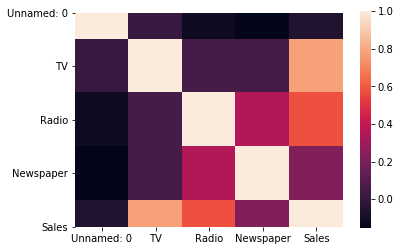

In [19]:
sns.heatmap(data1.corr(),square=True)

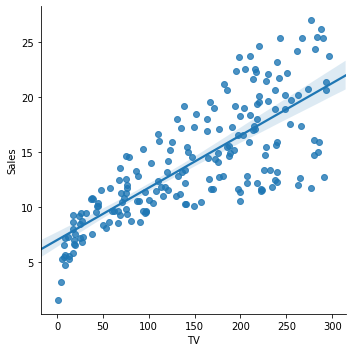

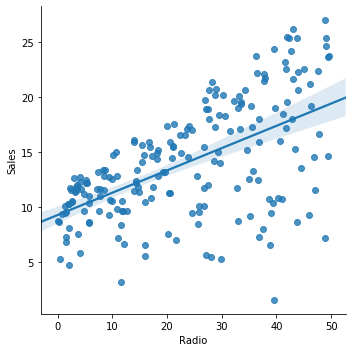

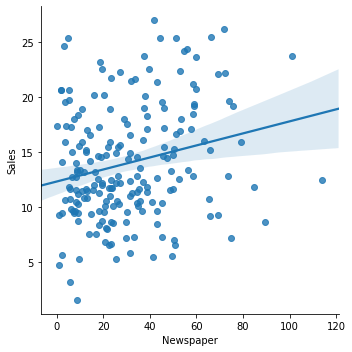

In [20]:
sns.lmplot(x='TV',y='Sales',data=data1)
sns.lmplot(x='Radio',y='Sales',data=data1)
sns.lmplot(x='Newspaper',y='Sales',data=data1)

In [21]:
#MODEL BUILDING

In [22]:
X = data1.drop(['Unnamed: 0','Sales'], axis=1)
Y = data1['Sales']

In [23]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

In [26]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [27]:
pred=model1.predict(X_test)

In [28]:
print("Linear Regression")
print("Accuracy of the model: ", r2_score(Y_test, pred))

Linear Regression
Accuracy of the model:  0.9151734116027949


In [29]:
print('MAE: ',metrics.mean_absolute_error(pred,Y_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(pred,Y_test)))
print('R-Squared: ',metrics.r2_score(pred,Y_test))

MAE:  1.265422005955453
RMSE:  1.5958402221167625
R-Squared:  0.8890013808436207


In [30]:
#SAVING THE MODEL

In [31]:
import pickle

In [32]:
filename = "Linear Reg.pkl"
pickle.dump(model1, open(filename, 'wb'))
print("Saved the Model")

Saved the Model
